# The porpuse of this small notebook is to test the addition of a random error to the quasar redshift simultaed by quickquasar. 
## As well, it can be used to run a redrock over individual pixels. If want to run over several files is best t use a slurm script.  
### The idea is to keep one single paramater --zbest but not it is a float used to define the standard deviation of a gaussian distribution for the error. So far the gaussian is the same independtly of the quasar redshift or magnitude. 

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
import desispec.io
from scipy import constants
%matplotlib inline
c = constants.speed_of_light/1000. #- km/s



## Lets define a plotting function to be used later in order to compare the redshift files, for a single pixel. 

In [7]:
def plot_zinfo(zbest,ztrue,label=None):
    dv = c * (zbest['Z'] - ztrue['Z']) / (1.0 + ztrue['Z'])
    err=(zbest['Z']/ztrue['Z']-1.)*100
    plt.figure(figsize=(20,6),dpi=100)
    plt.subplot(1,3,1)
    plt.scatter(ztrue['Z'],dv)
    plt.xlabel('z_true')
    plt.ylabel('dv')
    plt.title(label)
    plt.subplot(1,3,2)
    plt.scatter(ztrue['Z'],zbest['Z'],marker='.')
    plt.xlabel('z_true')
    plt.ylabel('z_best')
    plt.title(label)
    plt.subplot(1,3,3)
    plt.scatter(ztrue['Z'],err)
    plt.ylim(-0.5,0.5)
    plt.xlim(1,4)
    plt.xlabel('z_true')
    plt.ylabel(r'$\epsilon(\%)$')
    plt.title(label)

In [9]:
#Only if you are using your local version of desisim. If using master you can comment this cell
os.environ['PYTHONPATH']='/global/homes/a/alxogm/desi/code/desisim/py:'+os.environ['PYTHONPATH']
os.environ['PATH']='/global/homes/a/alxogm/desi/code/desisim/bin/:'+os.environ['PATH']

#Only if you are using your local version of redrock. If using master you can comment this cell
os.environ['PYTHONPATH']='/global/homes/a/alxogm/desi/code/redrock/py'+os.environ['PYTHONPATH']
os.environ['PATH']='/global/homes/a/alxogm/desi/code/redrock/bin/:'+os.environ['PATH']


## Next we set the simulation parameters and the file to analyze. In this case is the transmission-16-0.fits file.

### This first simulations saves the zbest file with the truth values, since zbest is set to 0.

In [12]:
exptime=4000   #Exposure time
#ifile='/project/projectdirs/desi/mocks/lya_forest/london/v2.0/0/0/transmission-16-0.fits'        #Transmission file to read, v3 cointains metals, most of the notebook works also with v2.0, except the part corresponding to the metal addition from transrmision file. 
ifile='/project/projectdirs/desi/mocks/lya_forest/london/v2.0/0/0/transmission-16-0.fits'   #Choose one pixel to simulate the quasars. 
outdir='/project/projectdirs/desi/users/alxogm/desi/lya_forest/random_errors_lya/'  #Where do you want to save the files, although in this particular notebook we will be overwritring the files. 
zmin=1.8
seed=123  #Seed to ensure reproducibility. 
specfile=outdir+'spectra-16-0.fits' 

In [15]:
cmd ='quickquasars --exptime {exptime} -i {ifile} -o {outfile} --zmin {zmin} --zbest 0 --mags --desi-footprint --overwrite \
 --seed {seed} --downsampling 0.4'.format(exptime=exptime,ifile=ifile,outfile=specfile,zmin=zmin,seed=seed)  
!time $cmd
ztrue=Table.read('/project/projectdirs/desi/users/alxogm/desi/lya_forest/random_errors_lya/zbest-16-0.fits')

INFO:quickquasars.py:544:main: Load SIMQSO model
INFO:quickquasars.py:549:main: Load DeCAM and WISE filters for target selection sim.
ifilename /project/projectdirs/desi/mocks/lya_forest/london/v2.0/0/0/transmission-16-0.fits
INFO:quickquasars.py:120:get_healpix_info: healpix=HPXPIXEL=0
INFO:quickquasars.py:125:get_healpix_info: nside=HPXNSIDE=16
INFO:quickquasars.py:133:get_healpix_info: hpxnest from HPXNEST = True
found 0 16 True
INFO:quickquasars.py:207:simulate_one_healpix: Read skewers in /project/projectdirs/desi/mocks/lya_forest/london/v2.0/0/0/transmission-16-0.fits, random seed = 2866
INFO:quickquasars.py:211:simulate_one_healpix: Read transmission file /project/projectdirs/desi/mocks/lya_forest/london/v2.0/0/0/transmission-16-0.fits
INFO:quickquasars.py:220:simulate_one_healpix: Select QSOs in DESI footprint 2384 -> 2384
INFO:quickquasars.py:325:simulate_one_healpix: Increase wavelength range from 3548:5819 to 3329:5819 to compute magnitudes
INFO:quickquasars.py:335:simulate_

### Now we run a second simulation with  zbest  set to 200km/s. This defines the standard deviation of a gaussian distribution. 

In [17]:
cmd ='quickquasars --exptime {exptime} -i {ifile} -o {outfile} --zmin {zmin} --zbest 200 --mags --desi-footprint --overwrite \
 --seed {seed} --downsampling 0.4'.format(exptime=exptime,ifile=ifile,outfile=specfile,zmin=zmin,seed=seed)  
!time $cmd

zbest=Table.read('/project/projectdirs/desi/users/alxogm/desi/lya_forest/random_errors_lya/zbest-16-0.fits')

INFO:quickquasars.py:544:main: Load SIMQSO model
INFO:quickquasars.py:549:main: Load DeCAM and WISE filters for target selection sim.
ifilename /project/projectdirs/desi/mocks/lya_forest/london/v2.0/0/0/transmission-16-0.fits
INFO:quickquasars.py:120:get_healpix_info: healpix=HPXPIXEL=0
INFO:quickquasars.py:125:get_healpix_info: nside=HPXNSIDE=16
INFO:quickquasars.py:133:get_healpix_info: hpxnest from HPXNEST = True
found 0 16 True
INFO:quickquasars.py:207:simulate_one_healpix: Read skewers in /project/projectdirs/desi/mocks/lya_forest/london/v2.0/0/0/transmission-16-0.fits, random seed = 2866
INFO:quickquasars.py:211:simulate_one_healpix: Read transmission file /project/projectdirs/desi/mocks/lya_forest/london/v2.0/0/0/transmission-16-0.fits
INFO:quickquasars.py:220:simulate_one_healpix: Select QSOs in DESI footprint 2384 -> 2384
INFO:quickquasars.py:325:simulate_one_healpix: Increase wavelength range from 3548:5819 to 3329:5819 to compute magnitudes
INFO:quickquasars.py:335:simulate_

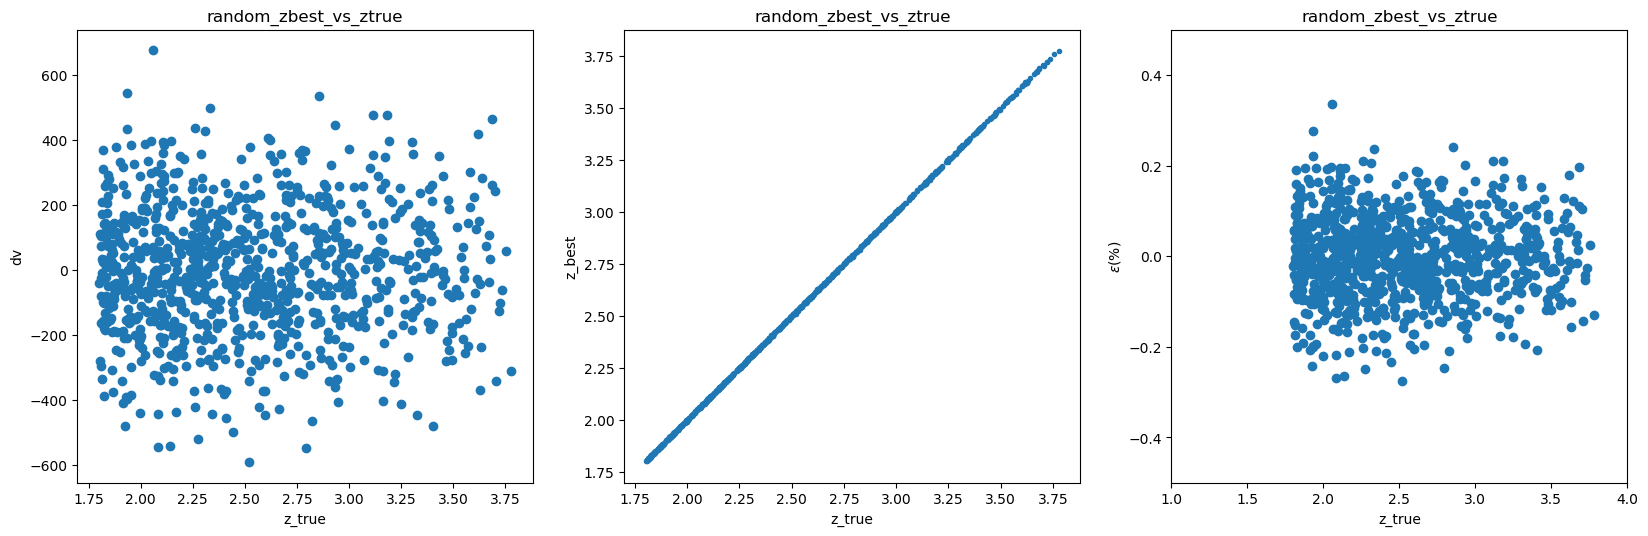

In [18]:
plot_zinfo(zbest,ztrue,'random_zbest_vs_ztrue')

### Let us now compare our simple redshift error addition, to the actual distribution obtained with redrock. If this notebook has been run several times you probably already have this computed, if this is the case then comment the cell to run redrock, and only read the file. 

In [19]:
rrzbestfile=outdir+'zbest_rr-16-0.fits'

#Uncomment  this cell if you need to run redrock for the first time. If zbest computed with redrock already exist you just need to read the files to make the plots. 
cmd = 'rrdesi_mpi {} --zbest {}'.format(specfile,rrzbestfile)
if 'NERSC_HOST' in os.environ:
    print('Running on a batch node:')
    print(cmd) 
    print() 
    #srun = 'srun -N 12 -n 384 -c 1 -t 00:01:30 -C haswell --qos interactive'
    srun = 'srun -N 4 -n 128 -c 1 -t 00:05:00 -C haswell --qos interactive'
    cmd = '{srun} {cmd}'.format(srun=srun, cmd=cmd)
!$cmd



In [23]:
rrzbest=Table.read(rrzbestfile)

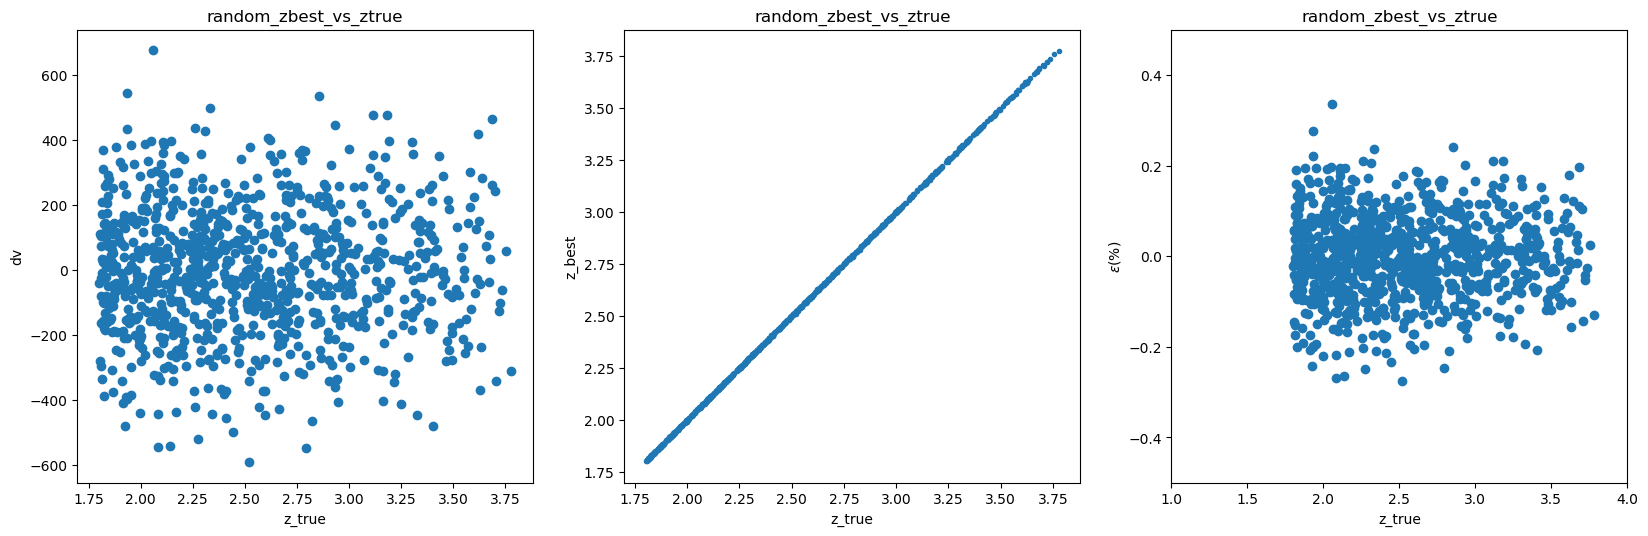

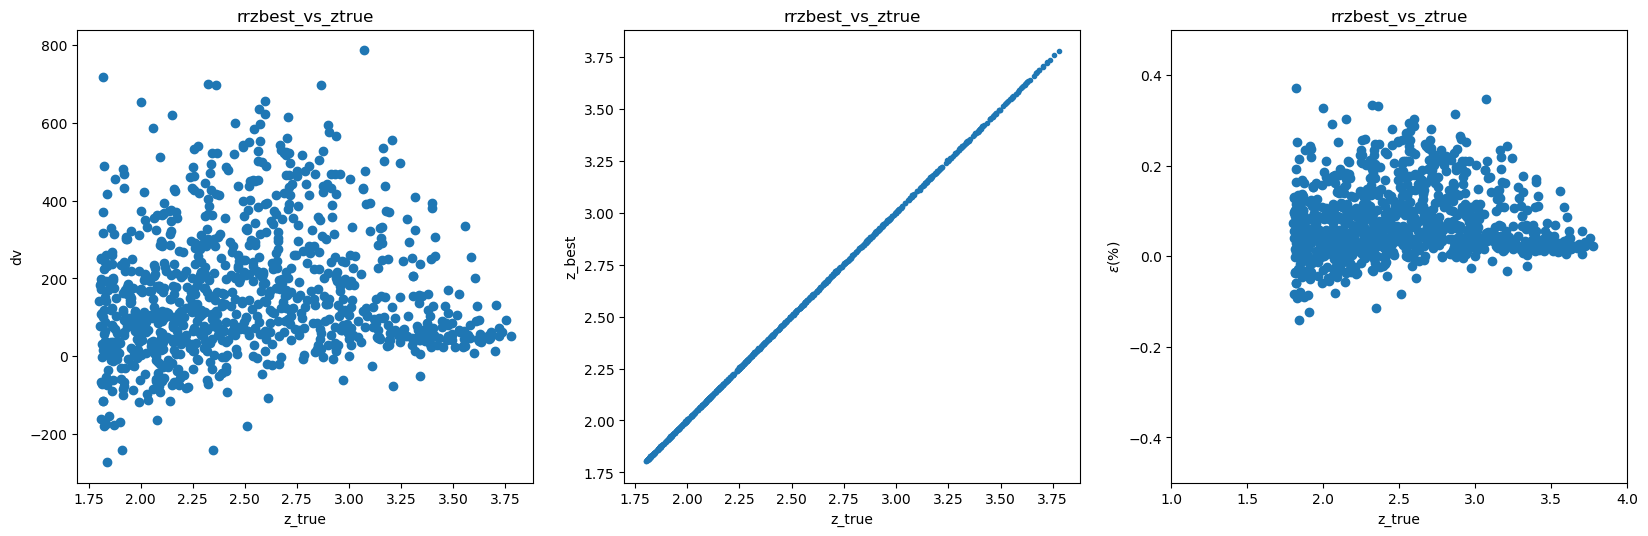

In [24]:
plot_zinfo(zbest,ztrue,'random_zbest_vs_ztrue')
plot_zinfo(rrzbest,ztrue,'rrzbest_vs_ztrue')

